In [3]:
data_path = "bank_data.csv"

In [4]:
import pandas as pd
df = pd.read_csv(data_path)

In [5]:
import pandas as pd
import numpy as np

In [6]:
df.head(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates
0,760,53,28,59,91950,2,1.9,2,0,0,0,0,1,0,2023-10-04 03:00:34
1,4374,30,6,139,94501,1,4.3,1,0,0,0,0,1,0,2023-05-11 18:19:54
2,781,32,7,42,92634,4,0.8,1,0,0,0,0,1,1,2023-10-29 10:08:49
3,2601,42,18,51,92868,3,2.1,3,0,0,0,0,0,0,2023-12-01 14:49:22
4,4336,36,10,82,94542,2,2.8,1,0,0,0,0,0,1,2023-06-27 22:03:59
5,478,64,39,24,95112,4,0.4,2,78,0,0,0,1,0,2023-03-21 13:16:19
6,3477,65,39,141,90280,2,6.9,1,0,0,1,0,1,0,2023-10-02 18:30:09
7,4975,59,33,64,92867,4,1.7,2,0,0,0,0,0,1,2023-08-25 04:56:40
8,1752,55,31,25,94720,2,0.2,1,0,0,0,0,0,0,2023-11-29 05:07:02
9,3364,58,34,54,93003,4,1.3,2,0,0,0,0,1,0,2023-12-20 16:27:46


In [8]:
df.shape

(365, 15)

In [9]:
df['Personal Loan'].value_counts(normalize=True)

0    0.923288
1    0.076712
Name: Personal Loan, dtype: float64

In [10]:
df['Personal Loan'].value_counts()

0    337
1     28
Name: Personal Loan, dtype: int64

In [25]:
def random_dates(start, end, n=365):
    
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2023-01-01')
end = pd.to_datetime('2023-12-31')
df['dates'] = random_dates(start, end)[:]
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates,income_class
0,760,53,28,59,91950,2,1.9,2,0,0,0,0,1,0,2023-11-01 19:50:45,Low
1,4374,30,6,139,94501,1,4.3,1,0,0,0,0,1,0,2023-12-25 18:21:44,High
2,781,32,7,42,92634,4,0.8,1,0,0,0,0,1,1,2023-12-25 05:35:49,Low
3,2601,42,18,51,92868,3,2.1,3,0,0,0,0,0,0,2023-06-13 10:13:43,Low
4,4336,36,10,82,94542,2,2.8,1,0,0,0,0,0,1,2023-08-09 09:57:37,Low


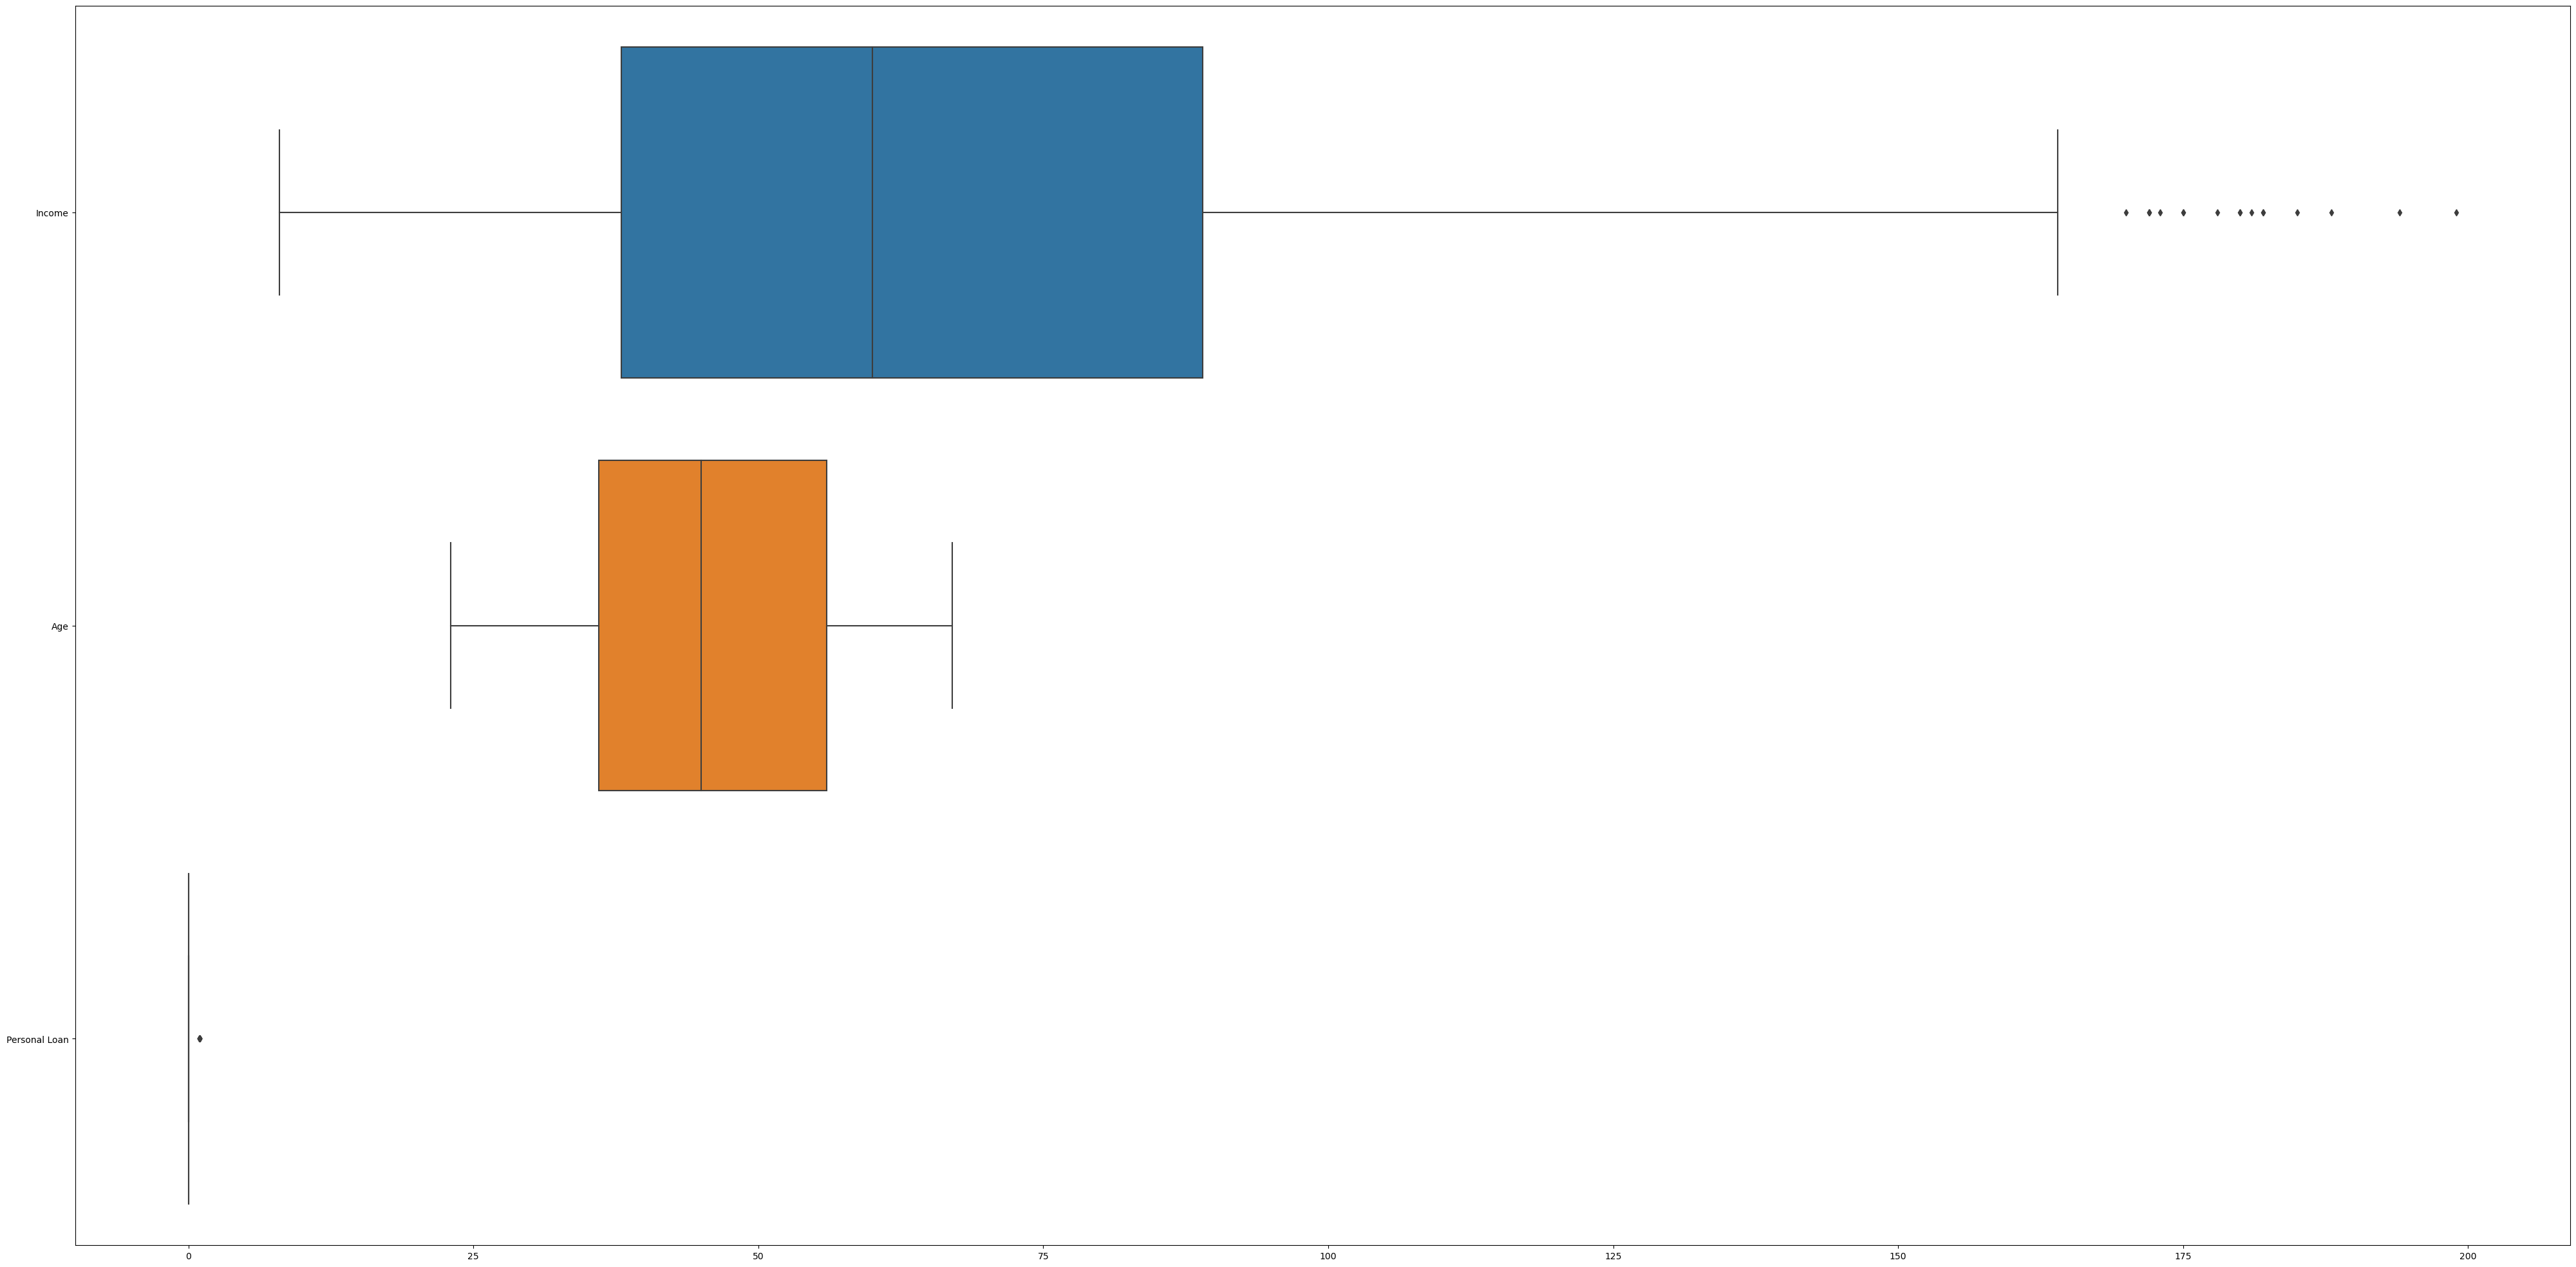

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (50,25)
sns.boxplot(data=df[['Income', 'Age', 'Personal Loan']], orient='h')
plt.show()

In [13]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2549.400000,45.320548,20.136986,69.435616,93179.849315,2.397260,1.821589,1.909589,58.630137,0.076712,0.115068,0.052055,0.602740,0.290411
std,1421.966053,11.570792,11.525074,43.750785,1735.610569,1.159525,1.681644,0.818764,98.096738,0.266500,0.319543,0.222442,0.490002,0.454575
min,16.000000,23.000000,-3.000000,8.000000,90019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1305.000000,36.000000,10.000000,38.000000,92037.000000,1.000000,0.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2636.000000,45.000000,20.000000,60.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3809.000000,56.000000,30.000000,89.000000,94609.000000,4.000000,2.400000,3.000000,108.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4975.000000,67.000000,43.000000,199.000000,96145.000000,4.000000,9.300000,3.000000,535.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
def classify_income(Income):
    if Income >= 100:
        return 'High'
    else:
        return 'Low'

# create a new column
df['income_class'] = df['Income'].apply(classify_income)

df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates,income_class
0,760,53,28,59,91950,2,1.9,2,0,0,0,0,1,0,2023-11-01 19:50:45,Low
1,4374,30,6,139,94501,1,4.3,1,0,0,0,0,1,0,2023-12-25 18:21:44,High
2,781,32,7,42,92634,4,0.8,1,0,0,0,0,1,1,2023-12-25 05:35:49,Low
3,2601,42,18,51,92868,3,2.1,3,0,0,0,0,0,0,2023-06-13 10:13:43,Low
4,4336,36,10,82,94542,2,2.8,1,0,0,0,0,0,1,2023-08-09 09:57:37,Low


In [27]:
df['income_class'] = df['Income'].apply(lambda x: 'High' if x >= 100 else 'Low')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates,income_class
0,760,53,28,59,91950,2,1.9,2,0,0,0,0,1,0,2023-11-01 19:50:45,Low
1,4374,30,6,139,94501,1,4.3,1,0,0,0,0,1,0,2023-12-25 18:21:44,High
2,781,32,7,42,92634,4,0.8,1,0,0,0,0,1,1,2023-12-25 05:35:49,Low
3,2601,42,18,51,92868,3,2.1,3,0,0,0,0,0,0,2023-06-13 10:13:43,Low
4,4336,36,10,82,94542,2,2.8,1,0,0,0,0,0,1,2023-08-09 09:57:37,Low


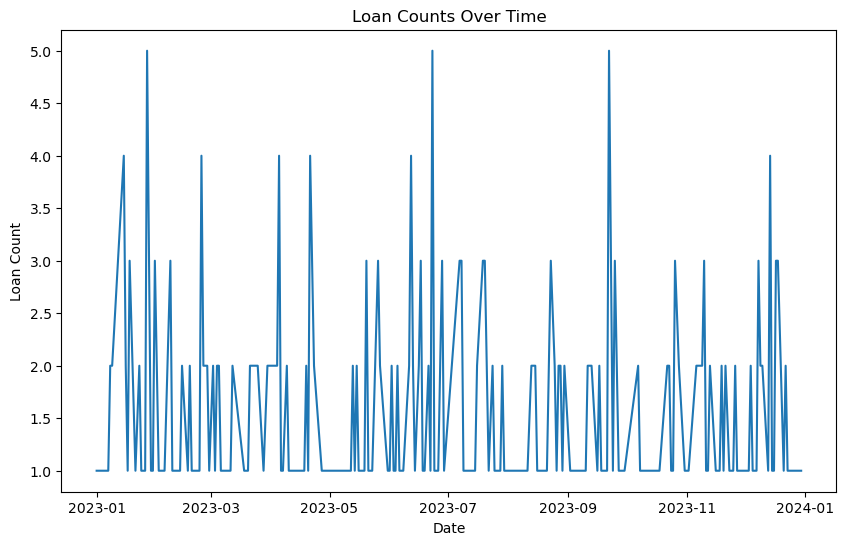

In [28]:
def random_dates(start, end, n=365):
    
    start_u = start.value//10**9
    end_u = end.value//10**9

    return pd.to_datetime(np.random.randint(start_u, end_u, n), unit='s')

start = pd.to_datetime('2023-01-01')
end = pd.to_datetime('2023-12-31')
df['dates'] = random_dates(start, end)[:]

# Group the data by date and count the number of loans per day
loan_counts = df.groupby(df['dates'].dt.date)['Personal Loan'].count()

# Create a line plot of loan counts over time
plt.figure(figsize=(10, 6))
loan_counts.plot()
plt.title('Loan Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Loan Count')
plt.show()

In [30]:
df['dates'] = pd.to_datetime(df['dates'])

# Extract the day of the week
df['day_of_week'] = df['dates'].dt.day_name()

# Display the updated DataFrame
print(df.head())

     ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0   760   53          28      59     91950       2    1.9          2   
1  4374   30           6     139     94501       1    4.3          1   
2   781   32           7      42     92634       4    0.8          1   
3  2601   42          18      51     92868       3    2.1          3   
4  4336   36          10      82     94542       2    2.8          1   

   Mortgage  Personal Loan  Securities Account  CD Account  Online  \
0         0              0                   0           0       1   
1         0              0                   0           0       1   
2         0              0                   0           0       1   
3         0              0                   0           0       0   
4         0              0                   0           0       0   

   CreditCard               dates income_class day_of_week  
0           0 2023-04-27 12:49:03          Low    Thursday  
1           0 2023-04-18

In [36]:
wednesday_data = df[df['day_of_week'] == 'Wednesday']
wednesday_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates,income_class,day_of_week
5,478,64,39,24,95112,4,0.4,2,78,0,0,0,1,0,2023-12-13 07:06:09,Low,Wednesday
21,2183,40,14,22,94566,2,1.4,3,0,0,0,0,0,0,2023-08-30 19:10:37,Low,Wednesday
25,3944,61,36,188,91360,1,9.3,2,0,1,0,0,0,0,2023-11-08 14:39:55,High,Wednesday
40,2225,38,12,29,92084,2,1.4,3,0,0,0,0,1,0,2023-01-18 21:55:32,Low,Wednesday
49,1960,50,24,130,95833,1,1.0,1,0,0,0,0,0,0,2023-02-01 02:35:06,High,Wednesday


In [38]:
sunday_data = df[df['day_of_week'] == 'Sunday']
sunday_data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates,income_class,day_of_week
3,2601,42,18,51,92868,3,2.1,3,0,0,0,0,0,0,2023-07-16 07:42:27,Low,Sunday
4,4336,36,10,82,94542,2,2.8,1,0,0,0,0,0,1,2023-05-07 09:52:59,Low,Sunday
9,3364,58,34,54,93003,4,1.3,2,0,0,0,0,1,0,2023-10-22 10:23:16,Low,Sunday
19,987,53,27,101,90245,4,4.9,1,0,0,0,0,1,0,2023-01-29 23:21:58,High,Sunday
20,1831,38,13,119,94571,2,7.8,1,221,0,0,0,0,0,2023-07-30 18:54:01,High,Sunday


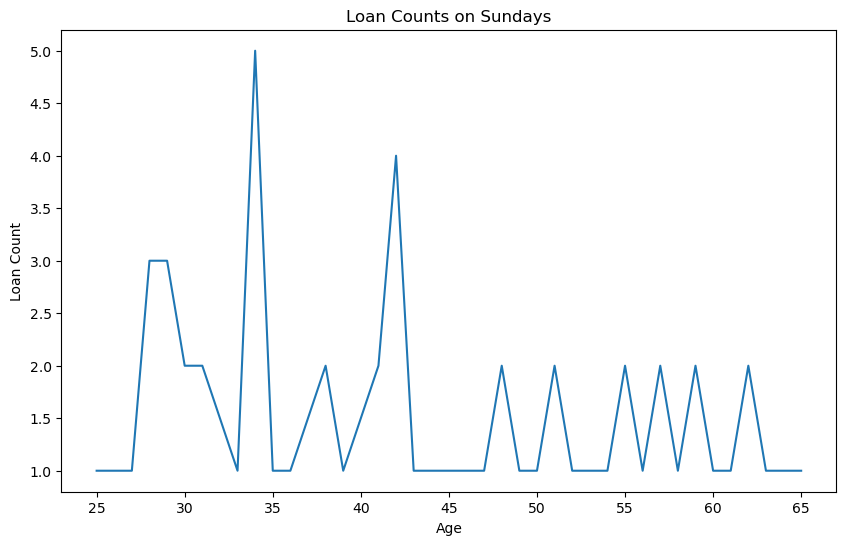

In [42]:
sunday_data = df[df['day_of_week'] == 'Sunday']

# Group the data by age and count the number of loans on Sundays
loan_counts = sunday_data.groupby(sunday_data['Age'])['Personal Loan'].count()

# Line plot of ages that requested for loans on Sundays
plt.figure(figsize=(10, 6))
loan_counts.plot()
plt.title('Loan Counts on Sundays')
plt.xlabel('Age')
plt.ylabel('Loan Count')
plt.show()

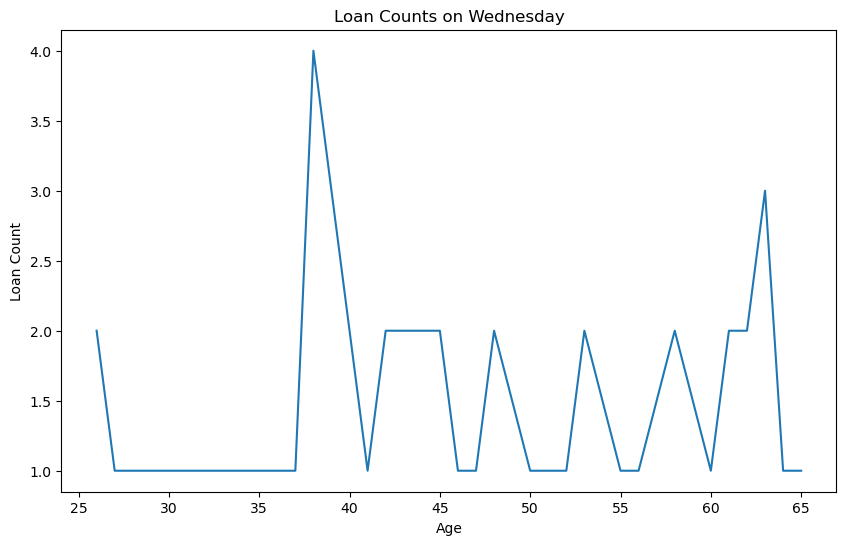

In [43]:
wednesday_data = df[df['day_of_week'] == 'Wednesday']

loan_counts = wednesday_data.groupby(wednesday_data['Age'])['Personal Loan'].count()

plt.figure(figsize=(10, 6))
loan_counts.plot()
plt.title('Loan Counts on Wednesday')
plt.xlabel('Age')
plt.ylabel('Loan Count')
plt.show()

In [45]:
df['dates'] = pd.to_datetime(df['dates'])

# Extract the day of the week
df['day_of_week'] = df['dates'].dt.day_name()

# Display the updated DataFrame
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,dates,income_class,day_of_week
0,760,53,28,59,91950,2,1.9,2,0,0,0,0,1,0,2023-04-27 12:49:03,Low,Thursday
1,4374,30,6,139,94501,1,4.3,1,0,0,0,0,1,0,2023-04-18 19:55:15,High,Tuesday
2,781,32,7,42,92634,4,0.8,1,0,0,0,0,1,1,2023-06-16 08:41:20,Low,Friday
3,2601,42,18,51,92868,3,2.1,3,0,0,0,0,0,0,2023-07-16 07:42:27,Low,Sunday
4,4336,36,10,82,94542,2,2.8,1,0,0,0,0,0,1,2023-05-07 09:52:59,Low,Sunday
